<H1><b><center>  Product Demand Forcasting Using Machine Learning Project </h1></b> </center>


<h2><b> Project Outlines :  </h2>
  <h6> 1.Import Libraries  </h6>
  <h6> 2. Data Collection </h6>
  <h6> 3. Dataset Description </h6>
  <h6> 4. Data Overview </h6>
  <h6> 5. Data Preprocessing </h6></b>
  
* Handling Missing Values 
*   Check Duplicates Values
*   Data formatting
*   Outlier Detection and Treatment
*   Feature Engineering


   <h6><b> 6. Exploratory Data Analysis (EDA)</h6></b>
    
*    Summary Statistics
 *    Correlation matrix
 *    Data visualization
 


<h6><b>  7.	Build the model   </h6> </b>

* Feature Selection
* Model Selection (lazypredict) 
* Split the data 
* Trine and Test the model
* Learning Curve 
* confusion matrix
* classification report






<h3><b> Import Libraries: </h3></b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats.mstats import winsorize
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import calendar
import warnings
warnings.filterwarnings("ignore")


<h3><b> Data Collection: </h3></b>



In [2]:
Calendar = pd.read_csv("AdventureWorks_Calendar.csv", encoding='latin1')
Customers = pd.read_csv("AdventureWorks_Customers.csv", encoding='latin1')
Product_Category = pd.read_csv("AdventureWorks_Product_Categories.csv", encoding='latin1')
Product_Subcategory = pd.read_csv("AdventureWorks_Product_Subcategories.csv", encoding='latin1')
Product = pd.read_csv("AdventureWorks_Products.csv", encoding='latin1')
Sales_2015 = pd.read_csv("AdventureWorks_Sales_2015.csv", encoding='latin1')
Sales_2016 = pd.read_csv("AdventureWorks_Sales_2016.csv", encoding='latin1')
Sales_2017 = pd.read_csv("AdventureWorks_Sales_2017.csv", encoding='latin1')
Sales_Territory = pd.read_csv("AdventureWorks_Territories.csv", encoding='latin1')

In [3]:
# Combine the dataframes into one DataFrame
Sales = pd.concat([Sales_2015, Sales_2016, Sales_2017], ignore_index=True)
# Merge Sales and Customer DataFrames on CustomerKey column
merged_SalesandCustomer = Sales.merge(Customers, on='CustomerKey', how='inner')
# merge Product with Product_Subcategory using ProductSubcategoryKey
merged_productandsubcategory = Product.merge(Product_Subcategory, on='ProductSubcategoryKey', how='left')
# Then, merge the result with Product_Category using ProductCategoryKey
merged_product = merged_productandsubcategory.merge(Product_Category, on='ProductCategoryKey', how='left')
# Merge merged_SalesandCustomer with merged_product using ProductKey
final_merged_data = merged_SalesandCustomer.merge(merged_product, on='ProductKey', how='left')
# Merge final_merged_data with Sales_Territory using TerritoryKey and SalesTerritoryKey
data= final_merged_data.merge(Sales_Territory, left_on='TerritoryKey', right_on='SalesTerritoryKey', how='left')

In [4]:
# Split the data into 90% for training and 10% for validation
data, validation_data = train_test_split(data, test_size=0.1, random_state=42)

# Save the validation data to a separate CSV file named 'validation_data.csv'
validation_data.to_csv('validation_data.csv', index=False)

# Save the remaining data to a separate CSV file named 'data.csv'
data.to_csv('data.csv', index=False)


<h3><b> Dataset Description : </h3></b>

* OrderDate: The date the order was placed.
* StockDate: The date the product was in stock.
* OrderNumber: The unique identifier for the order.
* ProductKey: The unique identifier for the product.
* CustomerKey: The unique identifier for the customer.
* TerritoryKey: The unique identifier for the sales territory.
* OrderLineItem: The unique identifier for the order line item.
* OrderQuantity: The number of units ordered.
* Prefix: The customer's title, such as Mr. or Mrs.
* FirstName: The customer's first name.
* LastName: The customer's last name.
* BirthDate: The customer's birthdate.
* MaritalStatus: The customer's marital status.
* Gender: The customer's gender.
* EmailAddress: The customer's email address.
* AnnualIncome: The customer's annual income.
* TotalChildren: The total number of children the customer has.
* EducationLevel: The customer's education level.
* Occupation: The customer's occupation.
* HomeOwner: Whether the customer is a home owner.
* ProductSubcategoryKey: The unique identifier for the product subcategory.
* ProductSKU: The product's stock keeping unit (SKU).
* ProductName: The product's name.
* ModelName: The product's model name.
* ProductDescription: The product's description.
* ProductColor: The product's color.
* ProductSize: The product's size.
* ProductStyle: The product's style.
* ProductCost: The cost of the product. his is a float type.
* ProductPrice: The price of the product.
* SubcategoryName: The name of the product subcategory.
* ProductCategoryKey: The unique identifier for the product category.
* CategoryName: The name of the product category.
* SalesTerritoryKey: The unique identifier for the sales territory.
* Region: The region where the customer is located. .
* Country: The country where the customer is located.
* Continent: The continent where the customer is located.





<h3><b> Data Overview: </h3></b>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50441 entries, 6913 to 15795
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              50441 non-null  object 
 1   StockDate              50441 non-null  object 
 2   OrderNumber            50441 non-null  object 
 3   ProductKey             50441 non-null  int64  
 4   CustomerKey            50441 non-null  int64  
 5   TerritoryKey           50441 non-null  int64  
 6   OrderLineItem          50441 non-null  int64  
 7   OrderQuantity          50441 non-null  int64  
 8   Prefix                 50100 non-null  object 
 9   FirstName              50441 non-null  object 
 10  LastName               50441 non-null  object 
 11  BirthDate              50441 non-null  object 
 12  MaritalStatus          50441 non-null  object 
 13  Gender                 50100 non-null  object 
 14  EmailAddress           50441 non-null  object 
 15 

In [6]:
data.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,...,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName,SalesTerritoryKey,Region,Country,Continent
6913,5/9/2017,4/19/2004,SO70226,478,12585,9,2,2,MR.,IAN,...,0,3.74,9.99,Bottles and Cages,4,Accessories,9,Australia,Australia,Pacific
46258,3/25/2017,2/23/2004,SO66831,537,21204,9,1,1,MS.,CANDICE,...,0,13.09,35.00,Tires and Tubes,4,Accessories,9,Australia,Australia,Pacific
480,5/22/2017,3/16/2004,SO71103,477,14847,10,3,2,MS.,VADIM,...,0,1.87,4.99,Bottles and Cages,4,Accessories,10,United Kingdom,United Kingdom,Europe
9478,11/27/2016,9/27/2003,SO58641,358,12287,10,1,1,MR.,ANDRE,...,U,1105.81,2049.10,Mountain Bikes,1,Bikes,10,United Kingdom,United Kingdom,Europe
15880,5/13/2016,2/11/2003,SO50468,332,27346,9,1,1,MS.,LESLIE,...,U,413.15,699.10,Road Bikes,1,Bikes,9,Australia,Australia,Pacific


 <h3><b> Data Preprocessing: </h3></b>

*   Handling Missing Values
*   Check Duplicates Values
*   Data formatting
*   Feature Engineering
*   Outlier Detection and Treatment


*  <b> Handling Missing Values </b>

In [7]:
#Check if there any missing values in dataset
print("Null Values: \n\n", data.isnull().sum())

#Remove Product Color Column that have null values and it's not important for our project
data.drop(columns=["ProductColor"], inplace=True)

# fill the missing values in the prefix column with the most frequent value
data['Prefix'].fillna(data['Prefix'].mode()[0], inplace=True)

# fill the missing values in the gender column with the string "Unknown"
data['Gender'].fillna('Unknown', inplace=True)

Null Values: 

 OrderDate                    0
StockDate                    0
OrderNumber                  0
ProductKey                   0
CustomerKey                  0
TerritoryKey                 0
OrderLineItem                0
OrderQuantity                0
Prefix                     341
FirstName                    0
LastName                     0
BirthDate                    0
MaritalStatus                0
Gender                     341
EmailAddress                 0
AnnualIncome                 0
TotalChildren                0
EducationLevel               0
Occupation                   0
HomeOwner                    0
ProductSubcategoryKey        0
ProductSKU                   0
ProductName                  0
ModelName                    0
ProductDescription           0
ProductColor             24156
ProductSize                  0
ProductStyle                 0
ProductCost                  0
ProductPrice                 0
SubcategoryName              0
ProductCategoryKey     

*  <b> Check Duplicates Values </b>

In [8]:
# Count the number of duplicated rows
print("Number of duplicated rows:",data.duplicated().sum() )

Number of duplicated rows: 0


*  <b> Data formatting  </b>

In [9]:
# Replace characters in the 'AnnualIncome' column
data['AnnualIncome'] = data['AnnualIncome'].astype(str)
data['AnnualIncome'] = data['AnnualIncome'].str.replace('[\$,]', '', regex=True).astype(int)


In [10]:
# converts the Date column to a datetime data type
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
# Add a new column for the day name
data['day_name'] = data['OrderDate'].dt.strftime('%A')
# Add a new column for the month name
data['month_name'] = data['OrderDate'].dt.strftime('%B %Y')

In [11]:
# Replace"Y" with"Yes" and "N" with "No."
data['HomeOwner'] = data['HomeOwner'].replace({'Y': 'Yes', 'N': 'No'})
# Replace 'M' with 'Married' and 'S' with 'Single'
data['MaritalStatus'] = data['MaritalStatus'].replace({'M': 'Married', 'S': 'Single'})
# Replace 'M' with 'Male' and 'F' with 'Female'
data['Gender'] = data['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [12]:
# Convert 'BirthDate' and 'OrderDate' to datetime format
data['BirthDate'] = pd.to_datetime(data['BirthDate'])
data['StockDate'] = pd.to_datetime(data['StockDate'])
data['OrderDate'] = pd.to_datetime(data['OrderDate'])


*  <b> Feature Engineering  </b>


In [13]:
# Merge "FirstName" and "LastName" columns with capitalized words
data['FullName'] = data['FirstName'].str.capitalize() + ' ' + data['LastName'].str.capitalize()
# Merge "Prefix" and "FullName" columns
data['FullName'] = data['Prefix'] + ' ' + data['FullName']
# drop the original "FirstName" and "LastName" columns
data.drop(['FirstName', 'LastName','Prefix'], axis=1, inplace=True)


In [14]:
# Calculate age by subtracting 'BirthDate' from 'OrderDate'
data['Age'] = (data['OrderDate'] - data['BirthDate']).astype('<m8[Y]').astype(int)

# Calculate profit using ProductPrice and ProductCost columns
data['Profit'] = data['ProductPrice'] - data['ProductCost']


In [15]:
print('\n\n Value counts for ProductSize column:\n',data['ProductSize'].value_counts())
print("________________________________________________________________________________")
print("\n\n Value counts for ProductStyle column:\n",data['ProductStyle'].value_counts())
# These two columns have no clear meaning , so we will delete them
columns_to_remove = ["EmailAddress", "ProductSize", "ProductStyle","OrderLineItem"]
data.drop(columns=columns_to_remove, inplace=True)




 Value counts for ProductSize column:
 0     31468
M      1837
L      1790
42     1739
44     1592
46     1574
48     1570
S      1498
38     1459
52     1090
58     1017
XL      696
40      640
70      629
50      450
54      448
60      429
62      366
56      149
Name: ProductSize, dtype: int64
________________________________________________________________________________


 Value counts for ProductStyle column:
 0    30228
U    16879
W     3334
Name: ProductStyle, dtype: int64


*  <b> Outlier Detection and Treatment  </b>


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numeric_features = ['AnnualIncome', 'TotalChildren', 'ProductPrice', 'ProductCost', 'Age']

# Convert data to numpy arrays for easier computation
numeric_data = np.array([data[feature] for feature in numeric_features]).T

# Detecting outliers using IQR method
Q1 = np.percentile(numeric_data, 25, axis=0)
Q3 = np.percentile(numeric_data, 75, axis=0)
IQR = Q3 - Q1

# Defining the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)



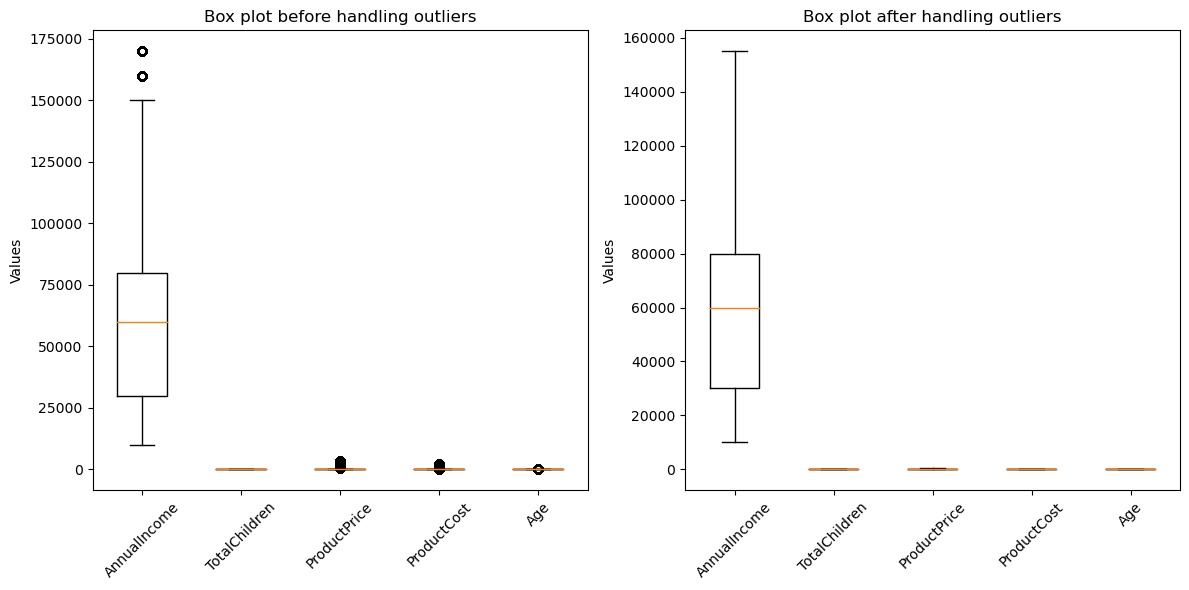

In [17]:
# Handling outliers by clipping values to the upper and lower bounds
numeric_data_clipped = np.clip(numeric_data, lower_bound, upper_bound)

# Visualizing outliers after handling
plt.figure(figsize=(12, 6))

# Box plot before handling outliers
plt.subplot(1, 2, 1)
plt.boxplot(numeric_data)
plt.xticks(ticks=range(1, len(numeric_features) + 1), labels=numeric_features, rotation=45)
plt.title("Box plot before handling outliers")
plt.ylabel("Values")

# Box plot after handling outliers
plt.subplot(1, 2, 2)
plt.boxplot(numeric_data_clipped)
plt.xticks(ticks=range(1, len(numeric_features) + 1), labels=numeric_features, rotation=45)
plt.title("Box plot after handling outliers")
plt.ylabel("Values")

plt.tight_layout()
plt.show()


<h3><b> Exploratory Data Analysis (EDA): </h3></b>


 *    Summary Statistics
 *    Correlation matrix
 *    Data visualization
 


*  <b> Summary Statistics  </b>

In [18]:
summary_stats = data.describe().T
# Define a function to highlight specific cells with colors
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #4EFFEF' if v else '' for v in is_max]
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: #D8A7CA' if v else '' for v in is_min]
# Apply the styles to the summary statistics DataFrame
styled_summary = summary_stats.style.apply(highlight_max, axis=0).apply(highlight_min, axis=0)
styled_summary

,count,mean,std,min,25%,50%,75%,max
ProductKey,50441.000000,438.789338,118.778697,214.000000,360.000000,479.000000,529.000000,606.000000
CustomerKey,50441.000000,18836.971908,5411.085480,11000.000000,13998.000000,18149.000000,23414.000000,29483.000000
TerritoryKey,50441.000000,6.256022,2.958394,1.000000,4.000000,7.000000,9.000000,10.000000
OrderQuantity,50441.000000,1.500981,0.612586,1.000000,1.000000,1.000000,2.000000,3.000000
AnnualIncome,50441.000000,59767.847584,33079.213526,10000.000000,30000.000000,60000.000000,80000.000000,170000.000000
TotalChildren,50441.000000,1.841894,1.619176,0.000000,0.000000,2.000000,3.000000,5.000000
ProductSubcategoryKey,50441.000000,23.410480,13.483969,1.000000,19.000000,28.000000,37.000000,37.000000
ProductCost,50441.000000,255.603195,496.257627,0.856500,2.973300,11.216300,59.466000,2171.294200
ProductPrice,50441.000000,438.678497,838.629504,2.290000,7.950000,29.990000,159.000000,3578.270000
ProductCategoryKey,50441.000000,3.102734,1.257709,1.000000,3.000000,4.000000,4.000000,4.000000


*  <b> Correlation matrix  </b>

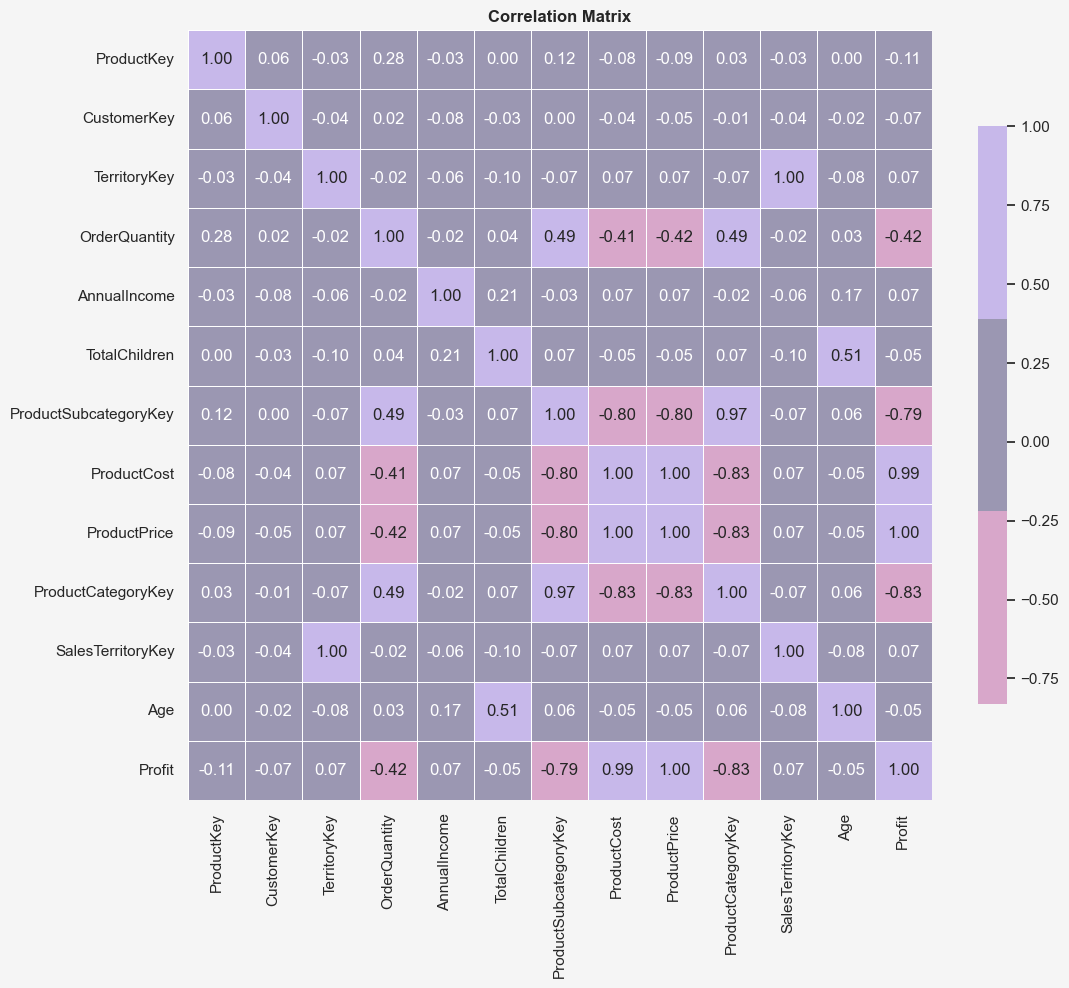

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64', 'int32'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the background color for the plot
plt.figure(figsize=(12, 10),facecolor='#f5f5f5')
sns.set(font_scale=1)
sns.set_style({"axes.facecolor": "#F5F5F5", "axes.edgecolor": "#F5F5F5", "grid.color": "#F5F5F5"})

# Define the color palette using specified colors
colors = ['#D8A7CA', '#9B97B2', '#C7B8EA']

# Create the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(colors), fmt=".2f", linewidths=.5, cbar_kws={"shrink": .75})

# Set the title
plt.title('Correlation Matrix', fontweight='bold')

plt.show()


*  <b> Data visualization  </b>

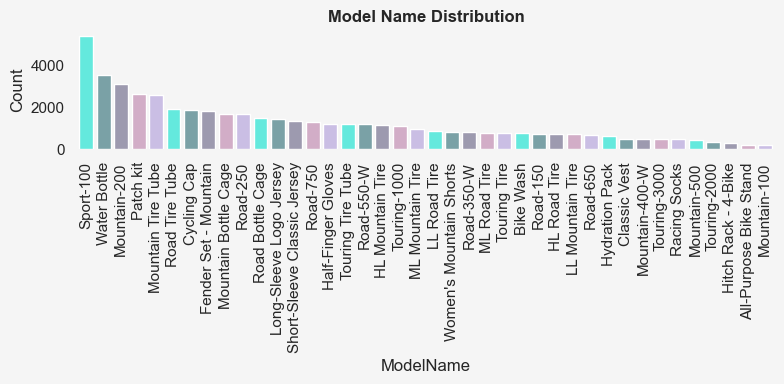

In [20]:
# Model Name Distribution
model_counts = data['ModelName'].value_counts()
# Define custom color palette for the bar chart
model_colors = ['#4EFFEF', '#73A6AD', '#9B97B2', '#D8A7CA', '#C7B8EA']  
# Create a bar chart for 'ModelName' with custom colors
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
sns.barplot(x=model_counts.index, y=model_counts.values, palette=model_colors, color='#F5F5F5')
plt.title('Model Name Distribution', fontweight='bold')  # Make the title bold
plt.xlabel('ModelName')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Remove borders from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

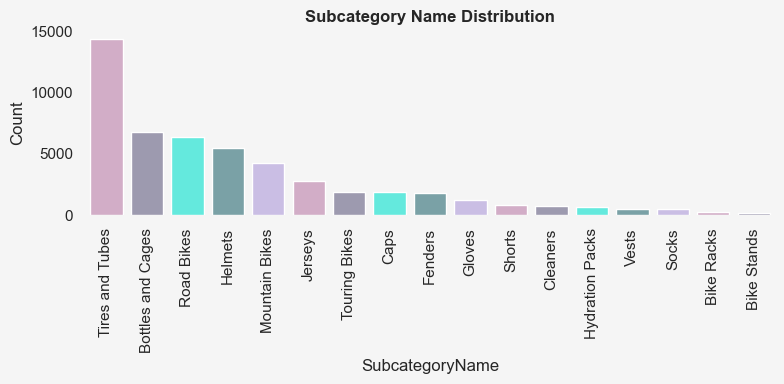

In [21]:
# Subcategory Name Distribution 
subcategory_counts = data['SubcategoryName'].value_counts()
# Define custom color palette for the bar chart
subcategory_colors = ['#D8A7CA', '#9B97B2', '#4EFFEF', '#73A6AD', '#C7B8EA']  # Customize as needed

fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')  # Set the background color to gray (#F5F5F5)

sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette=subcategory_colors, color='#F5F5F5')
plt.title('Subcategory Name Distribution', fontweight='bold')  # Make the title bold
plt.xlabel('SubcategoryName')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Remove borders from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


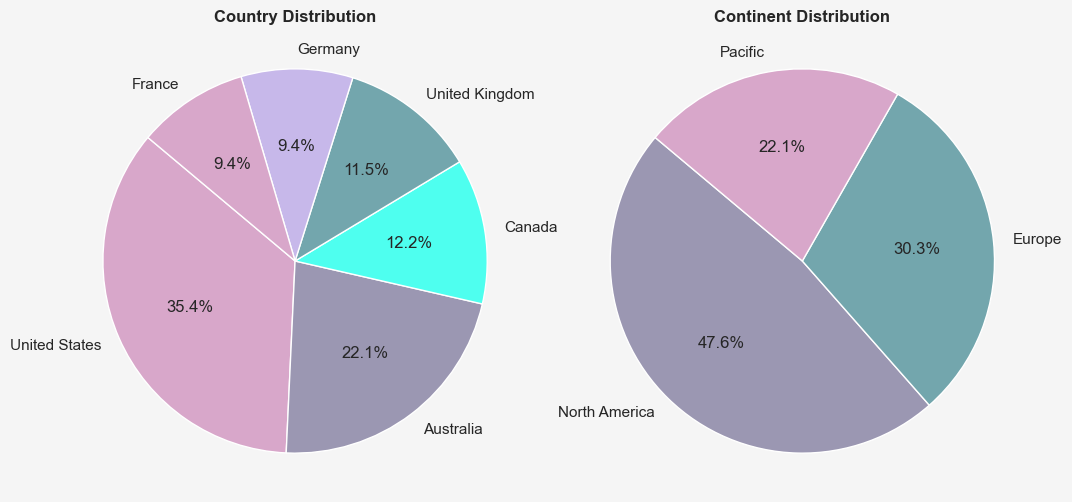

In [22]:
# Country and Continent Distribution
country_counts = data['Country'].value_counts()
continent_counts = data['Continent'].value_counts()

# Define custom colors for each pie chart
country_colors = ['#D8A7CA', '#9B97B2', '#4EFFEF', '#73A6AD', '#C7B8EA']  # Customize as needed
continent_colors = ['#9B97B2', '#73A6AD', '#D8A7CA', '#4EFFEF', '#C7B8EA']  # Customize as needed

# Create a subplot with 1 row and 2 columns for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('#F5F5F5')  # Set the background color to F5F5F5

# Create a pie chart for 'Country' with custom colors
axes[0].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=country_colors)
axes[0].set_title('Country Distribution', fontweight='bold')  # Make the title bold
axes[0].axis('equal')  # Remove aspect ratio for a circular pie chart

# Create a pie chart for 'Continent' with custom colors
axes[1].pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=continent_colors)
axes[1].set_title('Continent Distribution', fontweight='bold')  # Make the title bold
axes[1].axis('equal')  # Remove aspect ratio for a circular pie chart

# Remove borders from the subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.show()


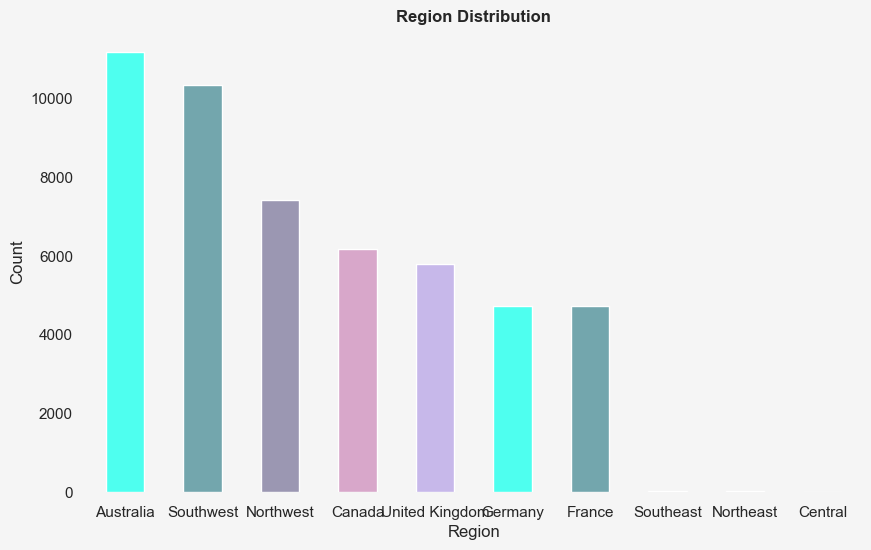

In [23]:
# Create a bar chart for 'Region' distribution
region_counts = data['Region'].value_counts()
region_colors = ['#4EFFEF', '#73A6AD', '#9B97B2', '#D8A7CA', '#C7B8EA']  # Customize as needed

# Set the background color to F5F5F5
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
# Create the bar chart with custom colors
region_counts.plot(kind='bar', color=region_colors)

# Set the title to bold and remove borders
plt.title('Region Distribution', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


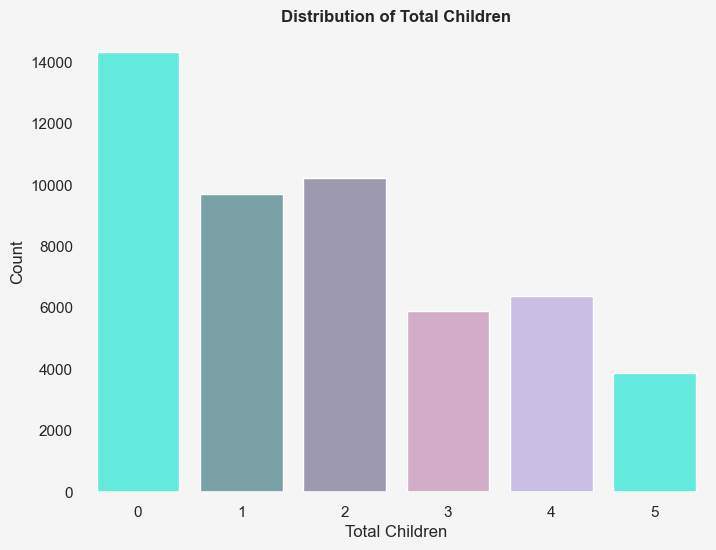

In [24]:
# Create a countplot for TotalChildren
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

sns.set_style("whitegrid")  # Set the style to whitegrid for removing borders
plt.gca().set_facecolor('#F5F5F5')   # Set the background color to F5F5F5

sns.countplot(data=data, x='TotalChildren', palette=['#4EFFEF', '#73A6AD', '#9B97B2', '#D8A7CA', '#C7B8EA'])
plt.title('Distribution of Total Children', fontweight='bold')  # Make the title bold
plt.xlabel('Total Children')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

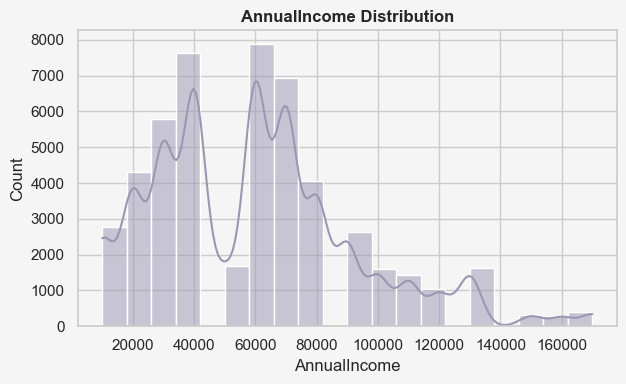

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color for the entire figure
fig = plt.figure(figsize=(12, 4))
fig.patch.set_facecolor('#F5F5F5')  # Set the background color to gray (#F5F5F5)


# Second subplot: AnnualIncome Distribution
ax2 = plt.subplot(1, 2, 2)
ax2.set_facecolor('#F5F5F5')  # Set the background color of the subplot to gray (#F5F5F5)
sns.histplot(data=data, x='AnnualIncome', bins=20, kde=True, color='#9B97B2')
plt.title('AnnualIncome Distribution', fontweight='bold')  # Make the title bold

plt.tight_layout()
plt.show()


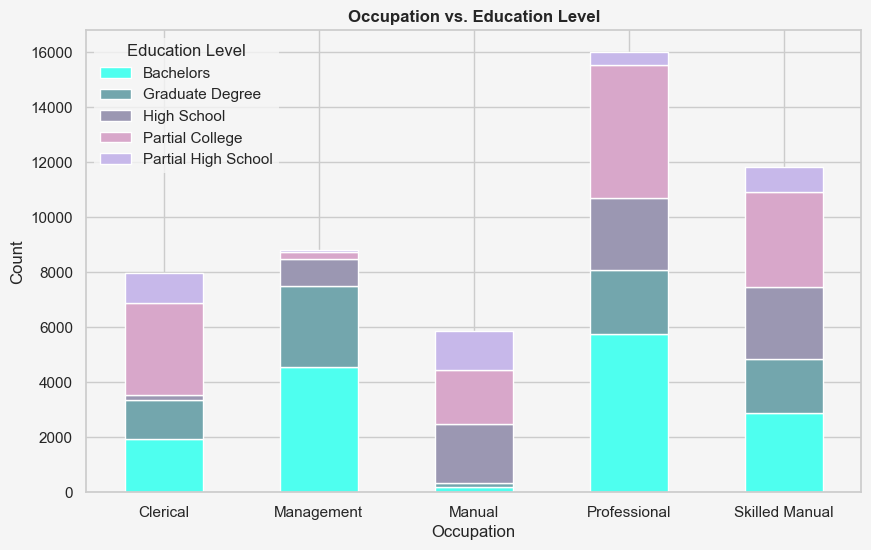

In [26]:
# Create a cross-tabulation of Occupation vs. EducationLevel
ct = pd.crosstab(data['Occupation'], data['EducationLevel'])
custom_colors = ['#4EFFEF', '#73A6AD', '#9B97B2', '#D8A7CA', '#C7B8EA']

# Create a stacked bar chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F5F5F5')  # Set the background color to gray (#F5F5F5)
ax.set_facecolor('#F5F5F5')  # Set the background color of the axis to gray (#F5F5F5)

ct.plot(kind='bar', stacked=True, color=custom_colors, ax=ax)
plt.title('Occupation vs. Education Level', fontweight='bold')  # Make the title bold
plt.xlabel('Occupation')
plt.ylabel('Count')

# Get the legend and set the background color to gray
legend = ax.legend(title='Education Level', loc='upper left')
legend.get_frame().set_facecolor('#F5F5F5')  # Set the legend's background color to gray
legend.get_frame().set_linewidth(0)  # Remove the legend frame

plt.xticks(rotation=0)
plt.show()


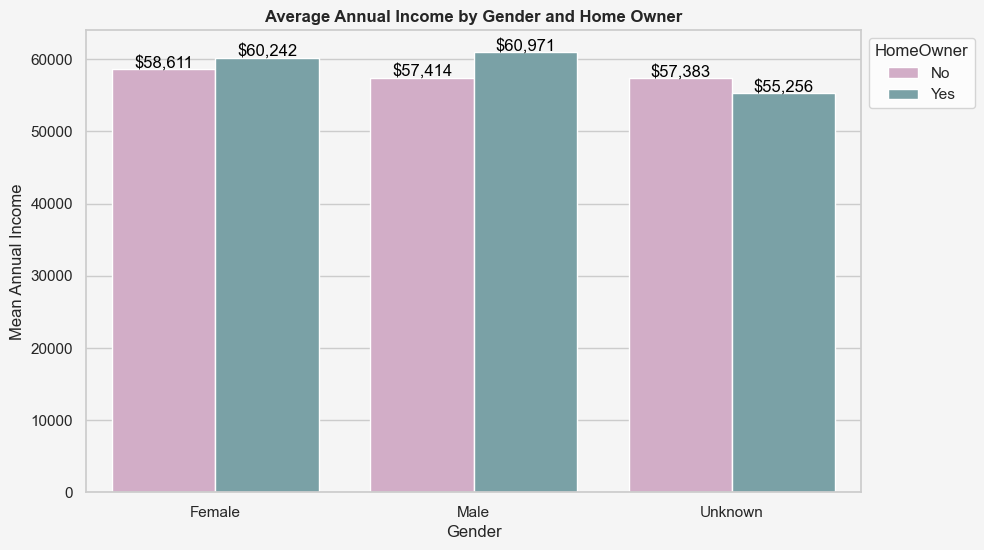

In [27]:
from numpy.ma.extras import average

colors_homeowner = {'Yes': '#D8A7CA', 'No': '#73A6AD'}
palette = [colors_homeowner.get(h, '#D8A7CA') for h in data['HomeOwner'].unique()]

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5') # Set the background color to gray (#F5F5F5)

# Grouped bar chart using pandas
data_grouped = data.groupby(['Gender', 'HomeOwner'])['AnnualIncome'].mean().reset_index()

ax = sns.barplot(data=data_grouped, x='Gender', y='AnnualIncome', hue='HomeOwner', palette=palette)

# Annotate the bars with values, handling missing values
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'${int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    else:
        ax.annotate('N/A', (p.get_x() + p.get_width() / 2., 0), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Average Annual Income by Gender and Home Owner', fontweight='bold')  # Make the title bold
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income')
plt.xticks(rotation=0)

# Move the legend outside
plt.legend(title='HomeOwner', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


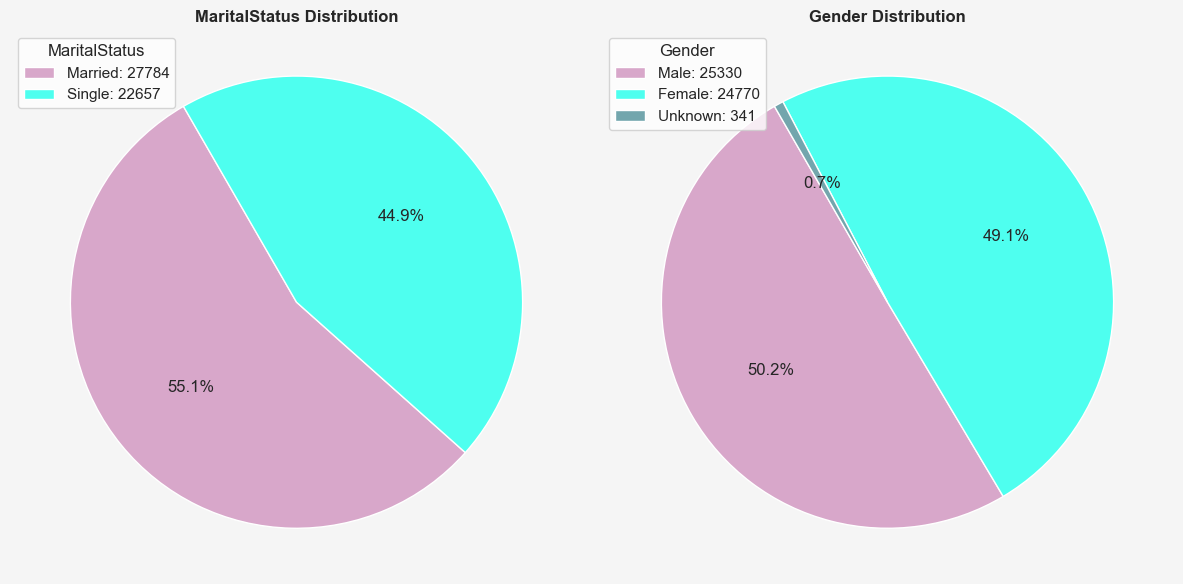

In [28]:
# Get the counts for MaritalStatus and Gender
marital_status_counts = data['MaritalStatus'].value_counts()
gender_counts = data['Gender'].value_counts()
custom_colors = ['#D8A7CA', '#4EFFEF', '#73A6AD']

# Create a figure with a gray background
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.set_facecolor('#F5F5F5')  # Set the background color to gray (#F5F5F5)

# Pie chart for MaritalStatus
marital_status_pie = ax1.pie(marital_status_counts, labels=None, autopct='%1.1f%%', startangle=120, colors=custom_colors)
ax1.axis('equal')
ax1.set_title('MaritalStatus Distribution', fontweight='bold')  # Make the title bold

# Legend for MaritalStatus
marital_status_labels = [f"{status}: {count}" for status, count in zip(marital_status_counts.index, marital_status_counts)]
ax1.legend(marital_status_labels, loc="upper left", title="MaritalStatus")  # Move legend to upper left corner

# Pie chart for Gender
gender_pie = ax2.pie(gender_counts, labels=None, autopct='%1.1f%%', startangle=120, colors=custom_colors)
ax2.axis('equal')
ax2.set_title('Gender Distribution', fontweight='bold')  # Make the title bold

# Legend for Gender
gender_labels = [f"{gender}: {count}" for gender, count in zip(gender_counts.index, gender_counts)]
ax2.legend(gender_labels, loc="upper left", title="Gender")  # Move legend to upper left corner

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Age Distribution')

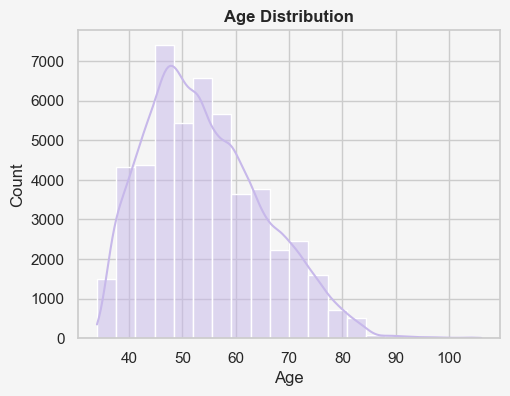

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color for the entire figure
fig = plt.figure(figsize=(12, 4))
fig.patch.set_facecolor('#F5F5F5')  # Set the background color to gray (#F5F5F5)

# First subplot: Age Distribution
ax1 = plt.subplot(1, 2, 1)
ax1.set_facecolor('#F5F5F5')  # Set the background color of the subplot to gray (#F5F5F5)
sns.histplot(data=data, x='Age', bins=20, kde=True, color='#C7B8EA', line_kws={'color': '#9B97B2'})
plt.title('Age Distribution', fontweight='bold')  # Make the title bold


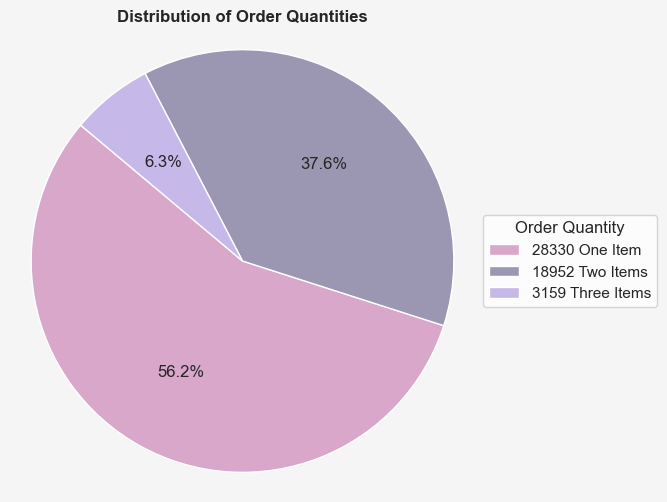

In [30]:
# Define a mapping of numeric values to text labels
data_for_visualization = data.copy()
quantity_mapping = {
    1: 'One Item',
    2: 'Two Items',
    3: 'Three Items'
}
data_for_visualization['OrderQuantity'] = data_for_visualization['OrderQuantity'].replace(quantity_mapping)

colors = ['#D8A7CA', '#9B97B2', '#C7B8EA']
order_quantity_counts = data_for_visualization['OrderQuantity'].value_counts()

# Create a figure with a gray background
fig, ax = plt.subplots(figsize=(6, 6))
fig.set_facecolor('#F5F5F5')  # Set the background color to gray (e.g., #D3D3D3)

# Create a pie chart
patches, texts, autotexts = plt.pie(order_quantity_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
legend_labels = [f'{count} {quantity}' for quantity, count in order_quantity_counts.items()]

# Add a legend outside the pie chart
plt.legend(legend_labels, title='Order Quantity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Order Quantities', fontweight='bold')  # Make the title bold
plt.axis('equal')
plt.show()


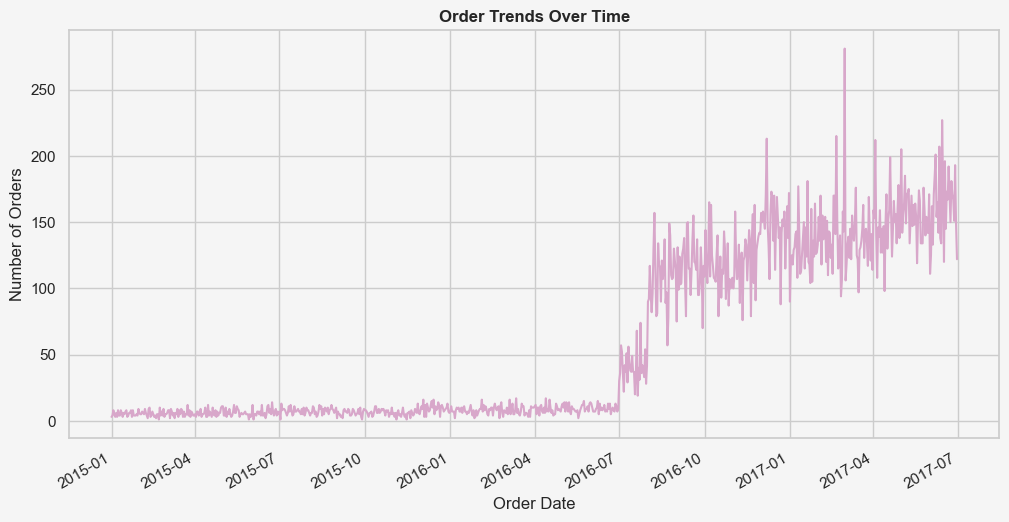

In [31]:
# Create a line plot to visualize order trends over time
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
data['OrderDate'].value_counts().sort_index().plot(color='#D8A7CA')

plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Order Trends Over Time', fontweight='bold')  # Make the title bold
plt.show()


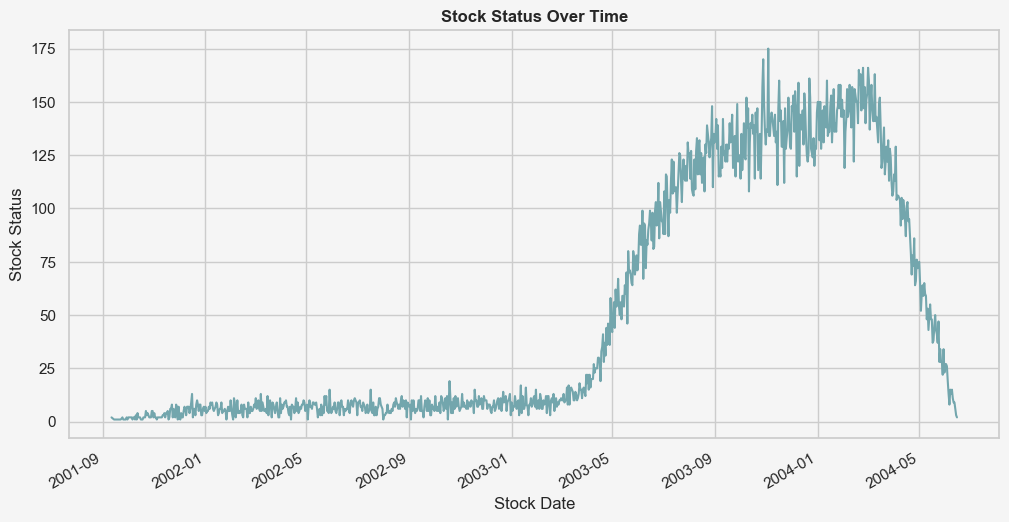

In [32]:
# Create a line plot to visualize stock status over time
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
data['StockDate'].value_counts().sort_index().plot(color='#73A6AD')  # Change the color here
plt.xlabel('Stock Date')
plt.ylabel('Stock Status')
plt.title('Stock Status Over Time', fontweight='bold')  # Make the title bold
plt.show()


In [ ]:
# Calculate stock status based on time difference between OrderDate and StockDate
StockStatus = (data['StockDate'] - data['OrderDate']).dt.days

fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

sns.lineplot(data=data, x='StockDate', y= StockStatus, hue='ProductCategoryKey', palette=colors)
plt.xlabel('Stock Date')
plt.ylabel('Stock Status')
plt.title('Stock Status by Product Category Over Time', fontweight='bold')  # Make the title bold
plt.legend(title='Product Category')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to F5F5F5
plt.figure(figsize=(8, 5), facecolor='#F5F5F5')  # Adjust the figure size
plt.gca().set_facecolor('#F5F5F5')

# Create the countplot
ax = sns.countplot(data=data, y='CategoryName', order=data['CategoryName'].value_counts().index, palette=colors)

# Set y-axis label size and weight
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')  # Increase font size and make it bold

# Set x-axis label size and weight
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold')  # Increase font size and make it bold

plt.xlabel('Count of Products', fontsize=12, fontweight='bold')  # Increase x-axis label font size and make it bold
plt.ylabel('Category', fontsize=14, fontweight='bold')  # Increase y-axis label font size and make it bold
plt.title('Product Categories ', fontsize=16, fontweight='bold')  # Increase title font size and make it bold

# Remove borders
sns.despine()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# Extract month and year from the 'OrderDate' column
YearMonth = data['OrderDate'].dt.to_period('M')

# Calculate total sales per month
total_sales_per_month = data.groupby(YearMonth)['OrderQuantity'].sum()

# Plotting with customizations
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
total_sales_per_month.plot(kind='bar', color='#73a6ad')  # Custom color: Flat Blue (Hex: #3498db)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales per Month', fontsize=16)  # Bold title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate average profit per product category
average_profit_per_category = data.groupby('ProductCategoryKey')['Profit'].mean()

# Category names from 'category name' column
category_names = data['CategoryName'].unique()

# Plotting with customizations
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
average_profit_per_category.plot(kind='bar', color='#9b97b2')  # Custom color: Vivid Orange (Hex: #ff5733)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Profit', fontsize=14)
plt.title('Average Profit per Product Category', fontsize=16)  # Bold title
plt.xticks(range(len(category_names)), category_names, rotation=45)  # Use category names as x-axis labels
plt.tight_layout()
plt.show()


In [ ]:
# Extract year from the 'OrderDate' column
data['Year'] = data['OrderDate'].dt.year

# Calculate average profit per year
average_profit_per_year = data.groupby('Year')['Profit'].mean().reset_index()

# Create an interactive bar plot using Plotly Express with specified bar color and background color
fig = px.bar(average_profit_per_year, x='Year', y='Profit',
             labels={'Profit': 'Average Profit', 'Year': 'Year'},
             text='Profit', height=500,
             color_discrete_sequence=['#d8a7ca'])  # Set the bar color to the specified hex code

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')

# Customize the title
fig.update_layout(
    title_text='Average Profit per Year',
    title_x=0.5,  # Set the title position to center
    title_font=dict(size=20, family='Arial', color='black'),  # Set title color to black
    plot_bgcolor='#f5f5f5',  # Set the background color to #f5f5f5
    paper_bgcolor='#f5f5f5'  # Set the color of the area outside the plot to #f5f5f5
)

# Show the interactive plot
fig.show()


In [ ]:

# Define the order of months to arrange according to the years
month_order = list(calendar.month_name)[1:]

# Define the order of years
year_order = [2015, 2016, 2017]

# Create a list of month names for each year
ordered_months = []
for year in year_order:
    ordered_months.extend([f"{month} {year}" for month in month_order])

# Convert 'month_name' column to a categorical data type with custom order
data['month_name'] = pd.Categorical(data['month_name'], categories=ordered_months, ordered=True)

# Calculate average profit per month
average_profit_per_month = data.groupby('month_name')['Profit'].mean().reset_index()

# Create a line plot for average profit per month using Plotly Express
fig = px.line(average_profit_per_month, 
              x='month_name', y='Profit', 
              labels={'Profit': 'Average Profit', 'month_name': 'Month'},
              title='<b>Average Profit per Month</b>',
              line_shape='linear',  # Set line style to linear
              line_dash_sequence=["solid"],  # You can change the line dash style if desired
              color_discrete_sequence=['#d8a7ca'])  # Custom color: Blue

# Customize the layout
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title='Month',
    yaxis_title='Average Profit',
    hovermode='x',  # Show hover info only for the x-axis
    showlegend=False,  # Hide the legend
    yaxis_gridcolor='#EAEAEA',  # Custom grid line color
    xaxis_showgrid=False,  # Hide x-axis grid lines
    title_x=0.5,  # Set the title position to center horizontally
    title_y=0.9,  # Set the title position to 90% of the plot height vertically
    plot_bgcolor='#F5F5F5',  # Set the background color for the entire plot
    paper_bgcolor='#F5F5F5'  # Set the background color for the plot area
)

# Show the interactive plot
fig.show()


<h3><b> Build the model : </h3></b>

* Feature Selection
* Model Selection (lazypredict) 
* Data Transformation
* split the data 
* Trine and Test the model
* Learning Curve 
* confusion matrix
* classification report

*  <b> Feature Selection  </b>

In [ ]:
# Define columns to remove
columns_to_remove = ['ProductKey', 'CustomerKey', 'TerritoryKey', 'ProductSubcategoryKey', 'ProductCategoryKey', 'SalesTerritoryKey', 'Year']

# Remove specified columns just for this part of the code
X = data.drop(columns=columns_to_remove).select_dtypes(include=[np.number]).drop('OrderQuantity', axis=1)
y = data['OrderQuantity']

model = ExtraTreesClassifier(n_estimators=10, random_state=42)  # You can set a random state for reproducibility
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


In [ ]:
feature_importance_df['Feature']

*  <b> lazypredict  </b>

In [ ]:
pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming the features and target variable are defined
features = feature_importance_df['Feature']
target = 'OrderQuantity'

# Split the data into training (15000 rows) and test set (4500 rows)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=4500, train_size=15000, stratify=y, random_state=42)


In [ ]:
from lazypredict.Supervised import LazyClassifier
# Initialize LazyClassifier
clf = LazyClassifier()

# Fit LazyClassifier on the training data
models_summary = clf.fit(X_train1, X_test1, y_train1, y_test1 )

models_summary

*  <b> split the data   </b>

In [ ]:
features = feature_importance_df['Feature']
target = 'OrderQuantity'

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# First, split the data into training (70%) and temporary set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)


In [ ]:
# Shape of training data
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  

# Shape of test data
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)    


In [ ]:
pip install plotly-express

*  <b> Train and Test the model   </b>

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [20, 30, 40],
    'seed': [42]
}

# Initialize LGBMClassifier
lgbm = LGBMClassifier(verbosity=1)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set using the best parameters
best_lgbm = grid_search.best_estimator_
test_accuracy = best_lgbm.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


*  <b> Learning Curve   </b>

In [ ]:
from sklearn.model_selection import learning_curve
# Define the LGBMClassifier with the best parameters
best_lgbm = LGBMClassifier(seed=42, num_leaves=20, max_depth=5, learning_rate=0.05, n_estimators=50)

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(best_lgbm, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6),facecolor='#f5f5f5')
plt.plot(train_sizes, train_mean, color='cyan', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='magenta', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='purple')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])  # Set y-axis limits (change these values according to your preference)
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()


*  <b> Confusion matrix   </b>

In [ ]:
import matplotlib.colors as mcolors

# Define custom colors for the colormap
colors = ['#AA98A9', '#d8a7ca', '#F2C1D1']  # Custom colors for the gradient

# Create a custom colormap using LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors, N=256)

# Get the best estimator from the grid search
best_lgbm = grid_search.best_estimator_

# Predict on test data using the best model
y_pred = best_lgbm.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom colormap and labels
plt.figure(figsize=(8, 6),facecolor='#f5f5f5')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, 
            xticklabels=range(1, conf_matrix.shape[1] + 1), yticklabels=range(1, conf_matrix.shape[0] + 1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()


*  <b> Classification Report   </b>


In [ ]:
# Calculate TP, TN, FP, FN
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Print metrics
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


In [ ]:

# Calculate TP, TN, FP, FN
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(np.tril(conf_matrix, k=-1))  # Use np.tril for correct TN calculation

# Print metrics
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


In [ ]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


*  <b> GUI   </b>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier

processed_data = pd.read_csv(r"./output_data/processed_file.csv")
X = processed_data.drop(columns=['OrderQuantity'])
y = processed_data['OrderQuantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [20, 30, 40]
}

lgbm_2 = LGBMClassifier(random_state=42, verbosity=1)

# Perform Grid Search with 5-fold cross-validation on the training data
grid_search_model = GridSearchCV(estimator=lgbm_2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_model.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_model.best_params_)
print("Best Accuracy: ", grid_search_model.best_score_)

# Evaluate the model on the test set using the best parameters
best_lgbm = grid_search_model.best_estimator_
test_accuracy = best_lgbm.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

In [ ]:
pip install joblib

In [ ]:
# Save the trained model using pickle
import pickle
model_filename = 'trained_model.pkl'
with open(model_filename, 'wb') as model_file:   
    pickle.dump(lgbm_2, model_file)

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the trained model
model = joblib.load(r"./output_data/trained_model.pkl")

# Read the processed data from the CSV file
read_data_needed = pd.read_csv(r"./output_data/processed_file.csv")

# Separate the target 'OrderQuantity' column from the features
X = read_data_needed.drop(columns=['OrderQuantity'])  # Features
y = read_data_needed['OrderQuantity']  # Target 'OrderQuantity'

# Make predictions using the loaded model
predictions = model.predict(X)

# Display the predictions
print(predictions)

In [ ]:
pip install PyMuPDF

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lightgbm import LGBMClassifier
import os 
import joblib
import fitz  # PyMuPDF
from PIL import Image, ImageTk

# Create a file to save the output processed data inside..
os.system("mkdir output_data")
# Function to upload a file and name it data1
def upload_file():
    global data1, data2
    try:
        file_path = filedialog.askopenfilename()
        data1 = pd.read_csv(file_path)
        data2 = data1.copy() 
        show_status("File Uploaded Successfully!")
    except Exception as e:
        show_status("You did not Upload a File...")

# Function to display data overview
def show_data_overview():
    if 'data1' in globals():
        win = tk.Toplevel()
        win.geometry("500x500")

        # Create a treeview to display columns
        tree = ttk.Treeview(win, columns=data1.columns, show='headings')

        # Define headings for the columns
        for idx, col in enumerate(data1.columns):
            tree.heading(idx, text=col)

        # Add data to the treeview
        for index, row in data1.iterrows():
            tree.insert('', tk.END, values=list(row))

        # Create scrollbars
        x_scrollbar = ttk.Scrollbar(win, orient=tk.HORIZONTAL, command=tree.xview)
        tree.configure(xscrollcommand=x_scrollbar.set)
        x_scrollbar.pack(side=tk.BOTTOM, fill=tk.X)

        y_scrollbar = ttk.Scrollbar(win, orient=tk.VERTICAL, command=tree.yview)
        tree.configure(yscrollcommand=y_scrollbar.set)
        y_scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        # Create a frame to display data shape and number of rows
        data_info_frame = tk.Frame(win)
        data_info_frame.pack(side=tk.BOTTOM, fill=tk.X)

        shape_info_label = tk.Label(data_info_frame, text=f"Data Shape: {data1.shape}")
        shape_info_label.pack(side=tk.LEFT)

        tree.pack(expand=True, fill='both')  # Pack the treeview to fill the remaining space

        win.mainloop()

    else:
        show_status("No data available. Please upload a file first.")

# Function to update status label text
def show_status(message):
    status_label.config(text=message)

# Function for additional processing
def data_processing():
    if 'data1' in globals():
        # Replace characters in the 'AnnualIncome' column
        data1['AnnualIncome'] = data1['AnnualIncome'].astype(str).str.replace('[\$,]', '', regex=True).astype(int)

        # Add a new column for the month name
        data1['month_name'] = pd.to_datetime(data1['OrderDate']).dt.strftime('%B %Y')

        # Calculate age by subtracting 'BirthDate' from 'OrderDate'
        data1['Age'] = (pd.to_datetime(data1['OrderDate']) - pd.to_datetime(data1['BirthDate'])).astype('<m8[Y]').astype(int)

        # Calculate 'Profit' column
        data1['Profit'] = data1['ProductPrice'] - data1['ProductCost']

        # Feature importance using Extra Trees Classifier
        columns_to_remove = ['ProductKey', 'CustomerKey', 'TerritoryKey', 'ProductSubcategoryKey', 'ProductCategoryKey', 'SalesTerritoryKey']
        data1.drop(columns=columns_to_remove, inplace=True)
        print('Number of features in the dataset:', data1.shape[1])
        
        X = data1.select_dtypes(include=[np.number]).drop('OrderQuantity', axis=1)
        y = data1['OrderQuantity']

        model = ExtraTreesClassifier(n_estimators=10, random_state=42)
        model.fit(X, y)

        # Get feature importances
        feature_importances = model.feature_importances_

        # Create a DataFrame to associate features with their importances
        feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        # Needed features
        features = feature_importance_df['Feature'].to_list()
        features.remove("OrderLineItem")
        features.append('OrderQuantity')
        data_needed = data[features]
        print(data_needed)
        data_needed.to_csv("./output_data/processed_file.csv", index=False)
        

        show_status("Data PreProcessing Completed")
    else:
        show_status("No data available. Please upload a file first.")


def predict():
        # Load the trained model
        model = joblib.load(r"./output_data/trained_model.pkl")

        # Read the processed data from the CSV file
        read_data_needed = pd.read_csv(r"./output_data/processed_file.csv")

        # Separate the target 'OrderQuantity' column from the features
        X = read_data_needed.drop(columns=['OrderQuantity'])  # Features
        y = read_data_needed['OrderQuantity']  # Target 'OrderQuantity'

        # Make predictions using the loaded model
        predictions = model.predict(X)
        # Add the predictions to processed_file.csv
        data2 = pd.read_csv("./output_data/processed_file.csv")
        data2["predictions"] = predictions
        # save the processed_file.csv after modified
        data2.to_csv("./output_data/processed_file_with_predictions.csv", index=False)
        # Display the predictions
        print(predictions)

        # Display the predictions
        messagebox.showinfo("Predictions", f"Predicted Order Quantity: {predictions}")


root = tk.Tk()
root.title("Product Demand Forecasting Using Machine Learning")
root.geometry("300x500")
root.resizable(0, 0)
root.config(bg="#FBF9FF")
# Create status label
status_label = tk.Label(root, text="", font=("Arial", 12), bg="#FBF9FF")
status_label.pack()

# Function to create and place widgets
def create_widgets():
    upload_button = tk.Button(root, text="Upload File", command=upload_file, width=20, height=2,
                              font="arial 15 bold", relief=tk.SOLID, bg="#d8a7ca", activebackground="#9395D3")
    upload_button.pack(pady=20)
    overview_button = tk.Button(root, text="Data Overview", command=show_data_overview, width=20, height=2, 
                               font="arial 15 bold", relief=tk.SOLID, bg="#d8a7ca", activebackground="#9395D3")
    overview_button.pack(pady=10)
    additional_processing_button = tk.Button(root, text="Data PreProcessing", command=data_processing, width=20,
                                             height=2, font="arial 15 bold",
                                             relief=tk.SOLID, bg="#d8a7ca", activebackground="#9395D3")
    additional_processing_button.pack(pady=10)
    # predict button
    predict_btn = tk.Button(root, text="Predict", command=lambda: predict(), width=20, height=2,
                            font="arial 15 bold", relief=tk.SOLID, bg="#d8a7ca", activebackground="#9395D3")
    predict_btn.pack(pady=10)
    
    # DISPLAY PDF
    pdf = tk.Button(root, text="PDF Viewer", command=lambda: open_pdf(), width=20, height=2,
                    font="arial 15 bold", relief=tk.SOLID, bg="#d8a7ca", activebackground="#9395D3")
    pdf.pack(pady=10)
    
    
def open_pdf():
    filepath = filedialog.askopenfilename(filetypes=[("PDF files", "*.pdf")])
    if filepath:
        display_pdf(filepath)

def display_pdf(filepath):
    doc = fitz.open(filepath)
    pdf_win = tk.Toplevel()
    pdf_win.title("PDF Viewer")
    pdf_win.geometry("610x600")

    canvas = tk.Canvas(pdf_win)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    scrollbar = tk.Scrollbar(pdf_win, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
    canvas.configure(yscrollcommand=scrollbar.set)

    images = []

    # Render pages as images and store them
    for i in range(len(doc)):
        page = doc.load_page(i)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        img = ImageTk.PhotoImage(img)
        images.append(img)

    y = 0  # Initial y-coordinate

    # Display pages on the canvas
    for img in images:
        canvas.create_image(0, y, anchor="nw", image=img)
        canvas.create_rectangle(0, y, img.width(), y + img.height(), outline="black")
        y += img.height() + 20  # Add spacing between pages

    # Update the scroll region
    canvas.update_idletasks()
    canvas.config(scrollregion=canvas.bbox("all"))

    pdf_win.mainloop()
    
create_widgets()
root.mainloop()
